In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:
data = np.load('/u/scr/ethanchi/relationOutputs/all/projections.npy')
extra = np.load('/u/scr/ethanchi/relationOutputs/all/data.npy')
pos = np.load('/u/scr/ethanchi/relationOutputs/all/pos.npy')
pairs = np.load('/u/scr/ethanchi/relationOutputs/all/pairs.npy')
diffs = np.load('/u/scr/ethanchi/relationOutputs/all/diffs.npy')

In [20]:
words_pos = np.stack((extra[:, 2], pos), axis=-1)
print(words_pos.shape)

(209595, 2)


In [5]:
len(np.where(extra[:, 2] == '這')[0])

38

In [45]:

deixis = "this", "that" #, "este", "ese", "aquel"
is_deixis = lambda x: (x[0] in deixis and x[1].endswith("DET"))
indices = np.apply_along_axis(is_deixis, 1, words_pos)
print(indices)
trimmed_data = data[indices]
trimmed_labels = words_pos[indices, 0]
trimmed_pairs = pairs[indices]
trimmed_diffs = diffs[indices]
print(f"There are {trimmed_data.shape[0]} data points.")
for word in deixis: print(f"There are {len(np.where(trimmed_labels == word)[0])} examples of \"{word}\".")

[False False False ... False False False]
There are 99 data points.
There are 85 examples of "this".
There are 14 examples of "that".


In [51]:
pca = PCA(n_components=2)
pca.fit(trimmed_pairs[:, 1])
transformed_data = pca.transform(trimmed_pairs[:, 0])
# %time transformed_data = pca.fit_transform(trimmed_pairs.reshape(-1, 32)).reshape(-1, 2, 2)
# transformed_data = pca.fit_transform(trimmed_diffs)
print(pca.explained_variance_)
print("Fitted.")


[0.19645543 0.14060645]
Fitted.


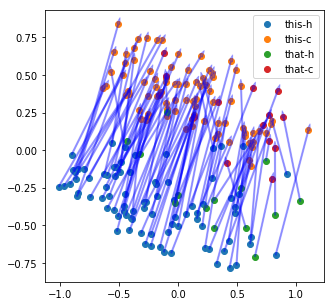

In [50]:
plt.figure(figsize=(5, 5))

for row in transformed_data:
  plt.arrow(row[0, 0], row[0, 1], row[1, 0]-row[0, 0], row[1, 1]-row[0, 1], color="blue", alpha=0.3, width=0.01)

for word in deixis:
  plt.scatter(transformed_data[trimmed_labels == word, 0, 0], transformed_data[trimmed_labels == word, 0, 1], label=word + "-h")
  plt.scatter(transformed_data[trimmed_labels == word, 1, 0], transformed_data[trimmed_labels == word, 1, 1], label=word + "-c")
  
plt.legend()
plt.show()

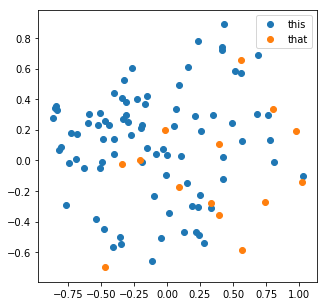

In [52]:
plt.figure(figsize=(5, 5))
for word in deixis:
  plt.scatter(transformed_data[trimmed_labels == word, 0], transformed_data[trimmed_labels == word, 1], label=word)
  
plt.legend()
plt.show()